In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict
import math
import numpy as np
from matplotlib.pyplot import figure

everything = pd.read_csv('worldcities.csv')

countries = everything.get('country')
cities = everything.get('city')

In [2]:
length = len(everything)

ordered = {}

for i in range(length):
    if countries[i] in ordered:
        ordered[countries[i]].append(cities[i])
    else:
        ordered[countries[i]] = [cities[i]]

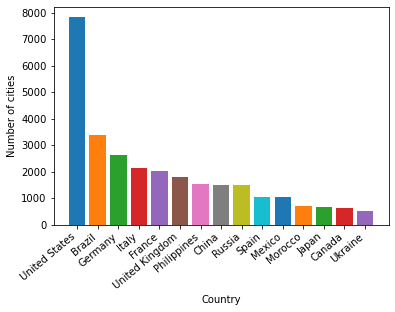

In [3]:
ordered = OrderedDict(sorted(ordered.items(), key = lambda x: len(x[1]), reverse=True))
maxlen = len(list(ordered.items())[0][1])

for i in range(15):
    tot = len(list(ordered.items())[i][1])
    plt.bar(list(ordered.items())[i][0], tot)


plt.xticks(rotation=40, ha='right')
plt.xlabel('Country')
plt.ylabel('Number of cities')
plt.show()

In [4]:
for city in ordered.items():
    for i in range(maxlen - len(city[1])):
        city[1].append(' ')

In [5]:
ordered = pd.DataFrame(ordered)
ordered.to_csv('new_cities.csv', index=False)

In [6]:
print(pd.read_csv('new_cities.csv'))

         United States          Brazil    Germany    Italy     France  \
0             New York       São Paulo     Berlin     Rome      Paris   
1          Los Angeles  Rio de Janeiro    Hamburg    Milan       Nice   
2              Chicago  Belo Horizonte     Munich   Naples   Toulouse   
3                Miami        Brasília    Cologne    Turin  Marseille   
4               Dallas        Salvador  Frankfurt  Palermo     Rennes   
...                ...             ...        ...      ...        ...   
7819         Ridgeland                                                  
7820            Dwight                                                  
7821  Oak Park Heights                                                  
7822         Gillespie                                                  
7823          Midfield                                                  

     United Kingdom    Philippines      China            Russia      Spain  \
0            London         Manila   Shanghai

In [7]:
def coord2dist(lat1, long1, lat2, long2):
    R = 6371
    φ1 = lat1 * math.pi/180
    φ2 = lat2 * math.pi/180
    Δφ = (lat2-lat1) * math.pi/180
    Δλ = (long2-long1) * math.pi/180

    
    a = math.sin(Δφ/2) * math.sin(Δφ/2) + math.cos(φ1) * math.cos(φ2) * math.sin(Δλ/2) * math.sin(Δλ/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))

    return(R * c)

In [8]:
def dist(lat1, lat2, long1, long2):
    lat = lat1-lat2
    long = long1-long2
    return(np.array(lat*lat+long*long))

4000
3000
2000
1000


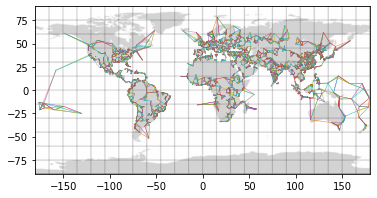

In [9]:
numcity = 10000
reduced = everything.head(numcity)
redlen = numcity

lats = np.array(reduced.get('lat'))
longs = np.array(reduced.get('lng'))
city = reduced.get('city')

close = {}

for j in range(numcity):
    closest = np.array([range(numcity), dist(lats, lats[j], longs, longs[j])])
    closest = closest[:,closest[1].argsort()]
    copy = 0
    
    if city[j]+str(0) in close:
        finish = False
        i=1
        while finish == False:
            if city[j]+str(i) in close:
                i+=1
            else:
                finish = True
        copy+=1      
        
            
    close[(city[j]+str(copy)).title()] = [[city[closest[0][1]], ("%.2f" % coord2dist(lats[int(closest[0][1])], longs[int(closest[0][1])], lats[j], longs[j]))]]
    for i in range(2,6):
        close[(city[j]+str(copy)).title()].append([city[closest[0][i]], ("%.2f" % coord2dist(lats[int(closest[0][i])], longs[int(closest[0][i])], lats[j], longs[j]))])
    
    for i in range(5):
        plt.plot([longs[j], longs[int(closest[0][i])]], [lats[j], lats[int(closest[0][i])]], linewidth=0.5)
        
    if not(j%1000):
        print(numcity - j)


plt.xlim(-180, 180)
plt.ylim(-90,90)
img = plt.imread("worldmap.png")
plt.imshow(img, extent=[-180, 180, -90, 90])

plt.savefig('connectedworld.png', dpi=400)


In [10]:
name = input("Which city would you like to check? ").title()

if name not in set(reduced['city']):
    finish = False
    while finish == False:
        name = input("Please enter a valid city: ").title()
        if name in set(reduced['city']):
            finish = True
            
options = reduced.loc[reduced['city'] == name]
if len(options) > 1:
    print('Which ' + name + ' did you want? ')
    for i in range(len(options)):
        print(str(i+1) + '. ' + list(options['city'])[i] + ', ' + list(options['admin_name'])[i] + ', ' + list(options['country'])[i])
    choice = input('Enter which number: ')
    try:
        choice = int(choice) - 1
    except ValueError:
        choice=choice
    if choice not in range(len(options)):
        finish = False
        while finish == False:
            choice = input('Please enter a valid number: ')
            try:
                choice = int(choice) - 1
            except ValueError:
                choice=choice
            if choice in range(len(options)):
                finish = True
else:
    choice = 0

print('The closest cities to ' + list(options['city'])[choice] + ', ' + list(options['admin_name'])[choice] + ', ' + list(options['country'])[choice] + ' are:')
for res in close.get(name + str(choice)):
    print('{}{}'.format(res[0].ljust(15), 'which is ' + res[1] + 'km away'))


Which city would you like to check? tokyo
The closest cities to Tokyo, Tōkyō, Japan are:
Toshima        which is 5.33km away
Minato         which is 6.40km away
Taitō          which is 8.33km away
Arakawa        which is 9.55km away
Shimotoda      which is 14.27km away
